## 第44课 使用程序设计流程图解析并建立神经网络(不依赖DL Library)

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


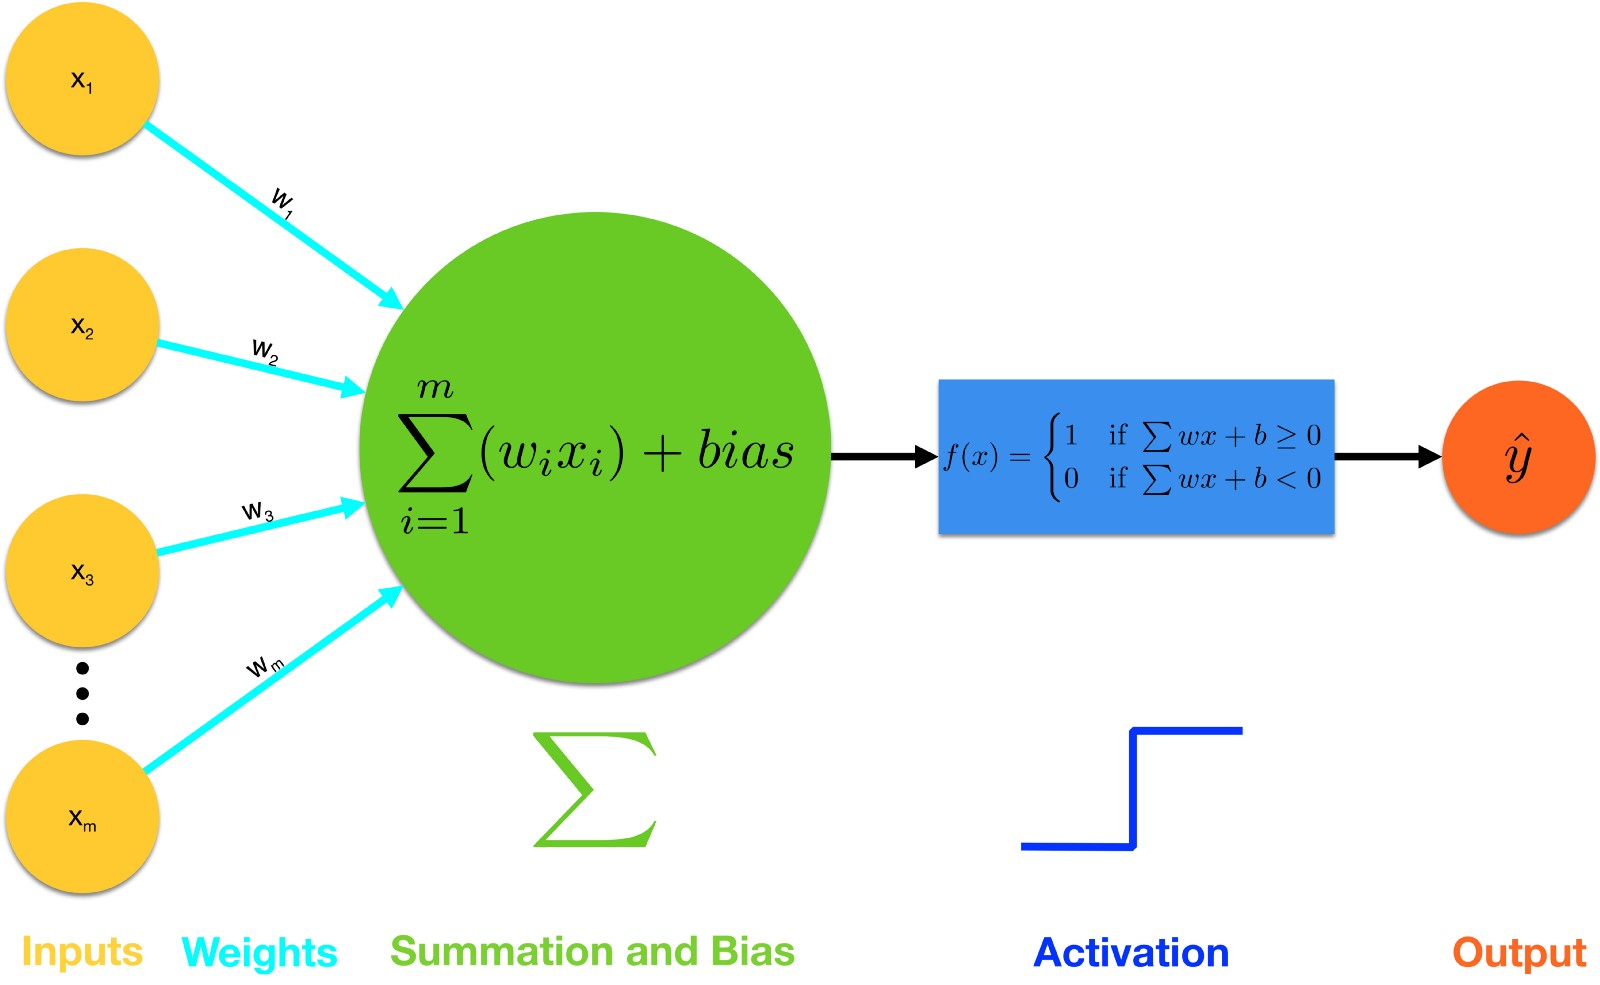

In [25]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson43-NN1.jpeg')

Inputs are fed into the perceptron

Weights are multiplied to each input

Summation and then add bias

Activation function is applied. Note that here we use a step function, but there are other more sophisticated activation functions like sigmoid, hyperbolic tangent (tanh), rectifier (relu) and more. No worries, we will cover many of them in the future!

Output is either triggered as 1, or not, as 0. Note we use y hat to label output produced by our perceptron model

Neural networks can be used for either regression or classification. Under regression model a single value is outputted which may be mapped to a set of real numbers meaning that only one output neuron is required

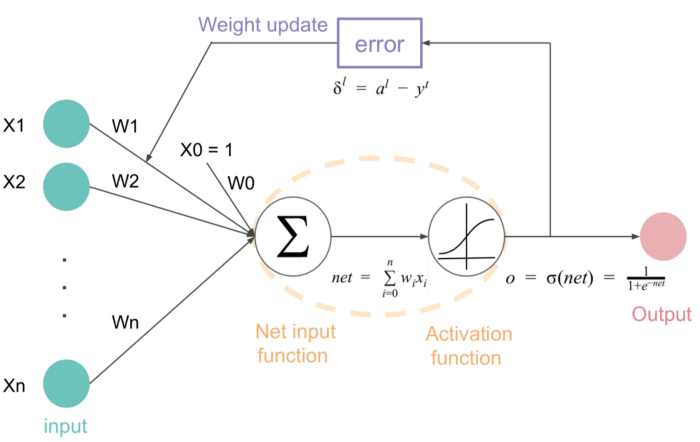

In [27]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson44-DL16.png')

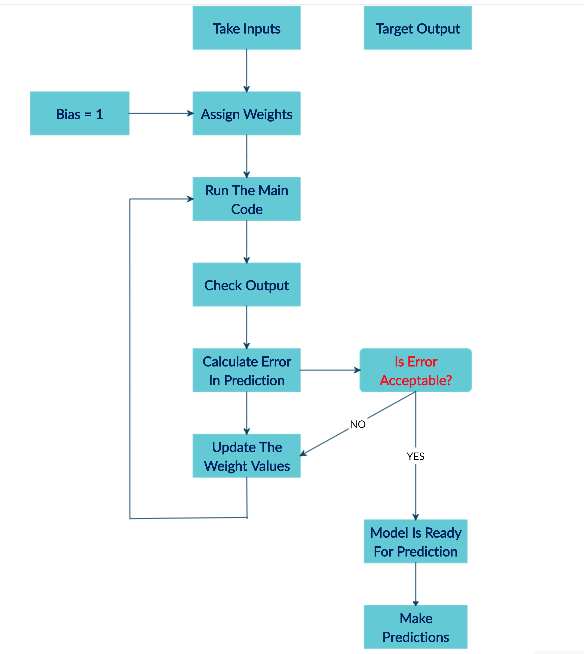

In [28]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson44-DL8.png')

## Flow chart for a simple neural network:

#(1)Take inputs
#(2)Add bias (if required)
#(3)Assign random weights to input features
#(4)Run the code for training.
#(5)Find the error in prediction.
#(6)Update the weight by gradient descent algorithm.
#(7)Repeat the training phase with updated weights.
#(8)Make predictions.

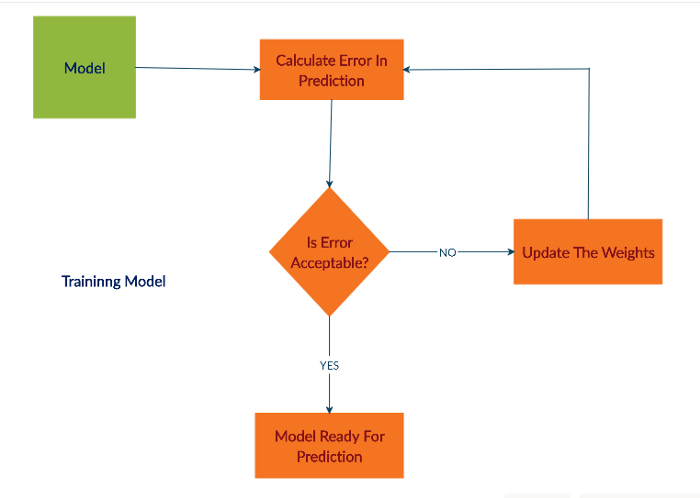

In [5]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson44-DL9.png')

#The training phase of a neural network:

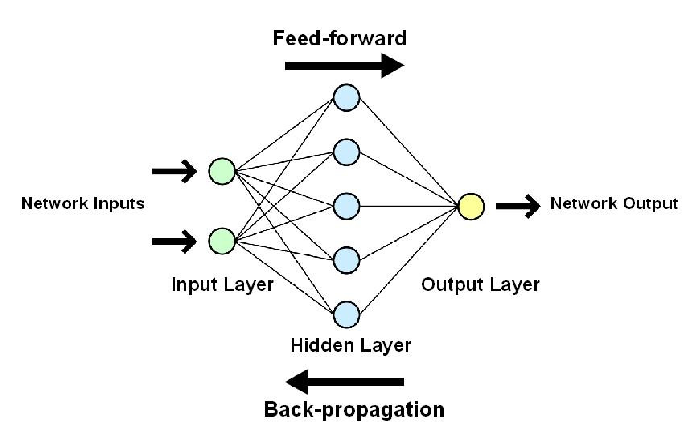

In [26]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson44-DL17.png')

(a) Feedforward:
On a feedforward neural network, we have a set of input features and some random weights. Notice that in this case, we are taking random weights that we will optimize using backward propagation.

(b) Backpropagation:
During backpropagation, we calculate the error between predicted output and target output and then use an algorithm (gradient descent) to update the weight values.

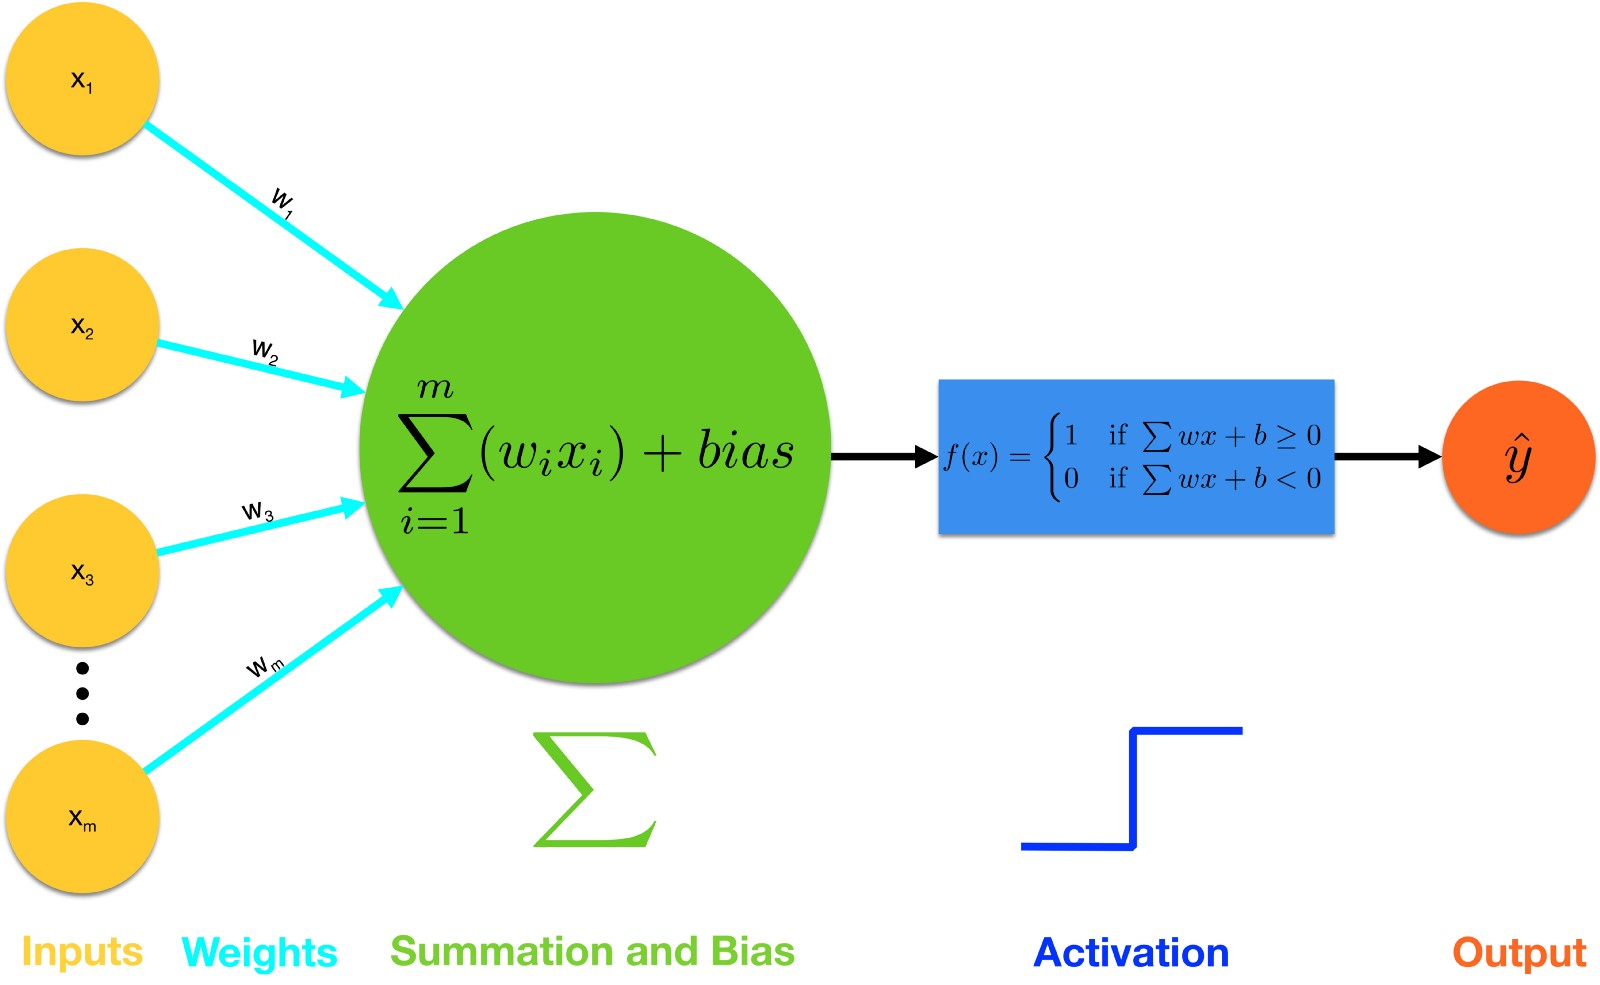

In [130]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson43-NN1.jpeg')

In [133]:
# Import the required libraries
import numpy as np
import pandas as pd

In [134]:
# Load the data
df = pd.read_csv('Lesson44-data.csv') 
df

,Glucose,BloodPressure,Outcome
0,148,72,1
1,85,66,0
2,183,64,1
3,89,66,0
4,137,40,1
...,...,...,...
763,101,76,0
764,122,70,0
765,121,72,0
766,126,60,1


In [135]:
# Separate the features and label
x = df[['Glucose','BloodPressure']]
y = df['Outcome']

In [30]:
# Define the sigmoid function
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [31]:
# Define the sigmoid derivative function
def sigmoid_derivative(input):
    return sigmoid(input) * (1.0 - sigmoid(input))

(c) The algorithm is used to effectively train a neural network through a method called chain rule. In simple terms, after each forward pass through a network, backpropagation performs a backward pass while adjusting the model’s parameters (weights and biases)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

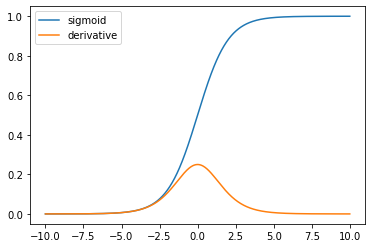

In [122]:
# show comparision
def sigmoid(xx):
    return 1 / (1 + np.exp(-xx))

def derivative(xx):
    return sigmoid(xx) * (1.0 - sigmoid(xx))

xx = np.linspace(-10, 10, 1000)

y1 = sigmoid(xx)
y2 = derivative(xx)

plt.plot(xx, y1, label='sigmoid')
plt.plot(xx, y2, label='derivative')
plt.legend(loc='upper left')
plt.show()

In [137]:
def train_network(x,y,weights,bias,learning_rate,epochs):  
    j=0
    k=[]
    l=[]
    for epoch in range(epochs):       
        dot_prod = np.dot(x, weights) + bias
        # using sigmoid
        preds = sigmoid(dot_prod)
        # Calculating the error
        errors = preds - y 
        # sigmoid derivative
        deriva_preds = sigmoid_derivative(preds)
        deriva_product = errors * deriva_preds
        #update the weights
        weights = weights -  np.dot(x.T, deriva_product) * learning_rate
        loss = errors.sum()
        j=j+1
        k.append(j)
        l.append(loss)
        print(j,loss)
    for i in deriva_product:
        bias = bias -  i * learning_rate
    plt.plot(k,l)
    return weights,bias

(d) Epochs. One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. 

(e) Loss is nothing but a prediction error of Neural Net. And the method to calculate the loss is called Loss Function. In simple words, the Loss is used to calculate the gradients. And gradients are used to update the weights of the Neural Net.

(f) Backpropagation and computing gradients(loss)

In [139]:
np.random.seed(10)
label = y.values.reshape(y.shape[0],1)
weights = np.random.rand(2,1)
bias = np.random.rand(1)
learning_rate = 0.0000004
epochs = 1000

In [138]:
weights

array([[0.77132064],
       [0.02075195]])

1 499.4127931094418
2 499.3155716715474
3 499.2044586230526
4 499.0784228417306
5 498.9367184674882
6 498.7790182416262
7 498.60554927146757
8 498.4172111008092
9 498.21565099984946
10 498.00327131277595
11 497.78315092889466
12 497.55887774106543
13 497.3343082561463
14 497.11328833784995
15 496.8993788830569
16 496.69562828499403
17 496.5044208004991
18 496.3274115135282
19 496.1655409205609
20 496.01911007028707
21 495.88789236502896
22 495.7712594990385
23 495.66830409470373
24 495.57794789059926
25 495.4990300658191
26 495.4303745903776
27 495.3708382144081
28 495.3193420914595
29 495.2748904586407
30 495.2365796404301
31 495.2036001930038
32 495.1752344560991
33 495.15085124325753
34 495.12989893442693
35 495.1118978563473
36 495.0964325444606
37 495.08314426414836
38 495.0717240146482
39 495.06190613204114
40 495.0534625361012
41 495.0461976197492
42 495.0399437517803
43 495.03455734781124
44 495.0299154569128
45 495.02591280925986
46 495.02245927132276
47 495.01947765825776
48 

400 23.869634021123133
401 23.867161346563698
402 23.864690257816537
403 23.862220768955584
404 23.859752894118504
405 23.857286647506893
406 23.854822043387042
407 23.852359096089764
408 23.84989782001127
409 23.84743822961247
410 23.8449803394198
411 23.842524164025928
412 23.840069718088863
413 23.83761701633356
414 23.835166073550894
415 23.83271690459909
416 23.83026952440322
417 23.827823947955963
418 23.825380190317563
419 23.822938266616397
420 23.820498192048895
421 23.81805998188022
422 23.81562365144414
423 23.813189216143904
424 23.810756691452127
425 23.808326092911308
426 23.805897436133776
427 23.8034707368021
428 23.80104601066998
429 23.798623273561574
430 23.79620254137252
431 23.793783830070137
432 23.79136715569376
433 23.788952534354554
434 23.786539982236615
435 23.78412951559666
436 23.781721150764483
437 23.77931490414366
438 23.7769107922112
439 23.774508831518617
440 23.772109038691404
441 23.769711430430377
442 23.767316023511
443 23.764922834784308
444 23.76

847 23.290238591336575
848 23.291470386972414
849 23.292722544722928
850 23.29399514895258
851 23.295288284226395
852 23.296602035308815
853 23.297936487162865
854 23.29929172494824
855 23.300667834021226
856 23.302064899932795
857 23.303483008428092
858 23.30492224544494
859 23.30638269711266
860 23.307864449750678
861 23.309367589868028
862 23.310892204161217
863 23.312438379513587
864 23.314006202993458
865 23.31559576185322
866 23.317207143528137
867 23.31884043563444
868 23.320495725968307
869 23.322173102504443
870 23.323872653394268
871 23.325594466965356
872 23.32733863171859
873 23.329105236327784
874 23.33089436963799
875 23.332706120663165
876 23.3345405785857
877 23.336397832753704
878 23.338277972680157
879 23.340181088041092
880 23.34210726867351
881 23.34405660457422
882 23.346029185897564
883 23.348025102954132
884 23.350044446208628
885 23.352087306278356
886 23.354153773930733
887 23.356243940082358
888 23.358357895796544
889 23.360495732281034
890 23.36265754088693
8

<IPython.core.display.Javascript object>

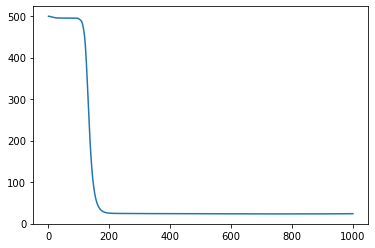

In [140]:
weights_final, bias_final = train_network(x,label,weights,bias,learning_rate,epochs)

In [141]:
weights_final

array([[ 0.06189634],
       [-0.12595182]])

In [142]:
bias_final

array([0.633647])

In [145]:
# Prediction
inputs = [[101,76]]
dot_prod = np.dot(inputs, weights_final) + bias_final
preds = sigmoid(dot_prod) >= 1/2
preds

array([[False]])